In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, InputLayer
from keras.optimizers import RMSprop
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import EarlyStopping

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

Using TensorFlow backend.


In [2]:
# MNISTデータを読込む
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# MNISTデータを加工する
x_train  = x_train.reshape(60000, 784)
x_test   = x_test.reshape(10000, 784)
x_train  = x_train.astype('float32')
x_test   = x_test.astype('float32')
x_train /= 255
x_test  /= 255
y_train  = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


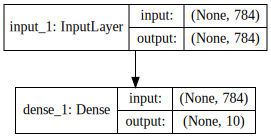

In [4]:
# モデルの構築
model = Sequential()
model.add(InputLayer(input_shape=(784,)))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

print(model.summary())
SVG(model_to_dot(model=model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

In [5]:
# 学習
epochs = 20
batch_size = 128
early_stopping = EarlyStopping(patience=0, verbose=1)
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test)
                    ,callbacks=[early_stopping]
                   )


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.5995 - acc: 0.8519 - val_loss: 0.3412 - val_acc: 0.9096
Epoch 2/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.3311 - acc: 0.9084 - val_loss: 0.3005 - val_acc: 0.9149
Epoch 3/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.3020 - acc: 0.9158 - val_loss: 0.2866 - val_acc: 0.9205
Epoch 4/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.2887 - acc: 0.9197 - val_loss: 0.2769 - val_acc: 0.9222
Epoch 5/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.2802 - acc: 0.9220 - val_loss: 0.2731 - val_acc: 0.9235
Epoch 6/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.2746 - acc: 0.9236 - val_loss: 0.2714 - val_acc: 0.9241
Epoch 7/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.2706 - acc: 0.9253 - val_loss: 0.2686 - val_acc

In [6]:
# 検証
score = model.evaluate(x_test, y_test, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 33us/step

Test loss: 0.2699857027024031
Test accuracy: 0.9265


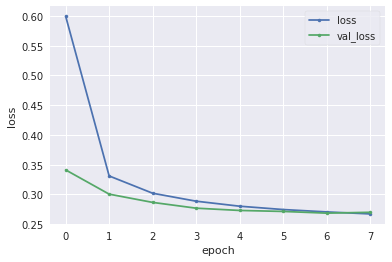

In [7]:
loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss,     marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10, frameon=True)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()